https://www.kaggle.com/miljan/customer-segmentation-and-visualizations-in-plotly

https://www.kaggle.com/code/miljan/customer-segmentation#notebook-container

https://www.kaggle.com/code/fabiendaniel/customer-segmentation/notebook

https://github.com/topics/customer-segmentation

https://towardsdatascience.com/making-your-neural-network-say-i-dont-know-bayesian-nns-using-pyro-and-pytorch-b1c24e6ab8cd

In [ ]:
#!git clone https://github.com/jalajthanaki/Customer_segmentation.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Projects/Customer Segmentation dataset/customer_segmentation_dataset.csv', encoding="ISO-8859-1")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## Data Cleansing

In [ ]:
# data= data.drop(data['CustomerID'])

## Exploratory Data Analysis (EDA)

In [ ]:
data.info() #we see that there are null values in a few columns- customer ID and description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe() # we see that there are negative unitprice and quantity which is odd.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Text(0.5, 1.0, 'Missing Values')

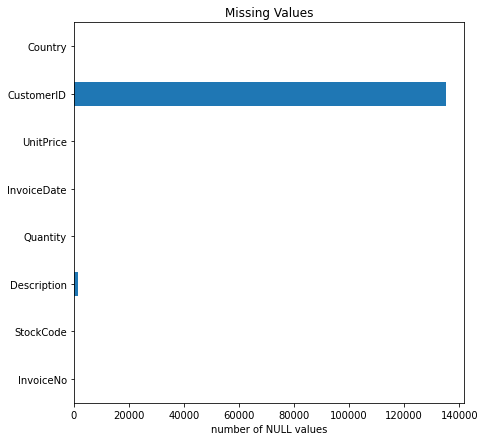

In [ ]:
plt.figure(figsize=(7,7))
data.isnull().sum(axis=0).plot.barh() #we have 1454 null entries in 'Description' and 135080 in CustomerID
plt.xlabel('number of NULL values')
plt.title('Missing Values')

In [ ]:
# a=[[9,8], [2, 3]]

In [ ]:
# np.array(a).T #.T gives transpose of a matrix

In [ ]:
nan_rows = data[data.isnull().any(axis=1)] #displaying the records with NaN in any of the columns

In [ ]:
nan_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
data[data['InvoiceNo']=='536414']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom


In [ ]:
temp=data[data['InvoiceNo']=='536544']

In [ ]:
temp[temp['CustomerID'].notna()] #We can't find the customerID using invoices therefore, remove those entries with customerID=NaN

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
data.dropna(axis=0, subset=['CustomerID'], inplace= True) #it is impossible to impute values for the user (customerID) and these entries are thus useless for the current exercise. So I delete them from the dataframe
data.shape

(406829, 8)

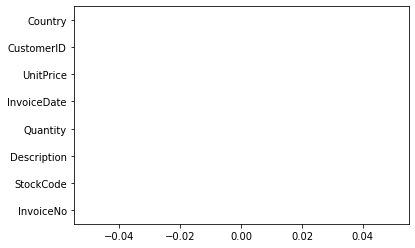

In [ ]:
data.isnull().sum(axis=0).plot.barh() #there are no null values in the dataset now

In [ ]:
data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.duplicated().sum()

5225

In [ ]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
data[data.Description=='UNION JACK FLAG LUGGAGE TAG'] # we can see that there are duplicate entries in the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
12236,537371,21866,UNION JACK FLAG LUGGAGE TAG,8,12/6/2010 12:47,1.25,15028.0,United Kingdom
12869,537399,21866,UNION JACK FLAG LUGGAGE TAG,3,12/6/2010 14:31,1.25,13030.0,United Kingdom
12942,537403,21866,UNION JACK FLAG LUGGAGE TAG,1,12/6/2010 14:43,1.25,17191.0,United Kingdom
...,...,...,...,...,...,...,...,...
517672,580074,21866,UNION JACK FLAG LUGGAGE TAG,12,12/1/2011 14:06,1.25,15028.0,United Kingdom
525707,580635,21866,UNION JACK FLAG LUGGAGE TAG,2,12/5/2011 12:30,1.25,14649.0,United Kingdom
527644,580727,21866,UNION JACK FLAG LUGGAGE TAG,1,12/5/2011 17:17,2.46,14096.0,United Kingdom
534838,581173,21866,UNION JACK FLAG LUGGAGE TAG,1,12/7/2011 15:07,1.25,17870.0,United Kingdom


In [ ]:
data.drop_duplicates(inplace= True) #inlace= True make these changes in the original dataframe which is 'data'

In [ ]:
data.shape

(401604, 8)

In [ ]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
data.Country.nunique() #nunique gives the number of unique elements

37

In [ ]:
grpBy= data[['CustomerID', 'Country']].drop_duplicates()

In [ ]:
grpBy.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
#more than 90% of the roders are from UK

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [ ]:
data[data.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
temp= data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count() #without  as_index=False, it will be a series not a dataframe

In [ ]:
nb_products_per_basket = temp.rename(columns= {'InvoiceDate':'Number of products'})

In [ ]:
nb_products_per_basket.columns

Index(['CustomerID', 'InvoiceNo', 'Number of products'], dtype='object')

In [ ]:
nb_products_per_basket.InvoiceNo = nb_products_per_basket.InvoiceNo.astype(str)

In [ ]:
nb_products_per_basket['ordersCancelled']= nb_products_per_basket['InvoiceNo'].apply(lambda x:int ('C' in x))

In [ ]:
nb_products_per_basket

,CustomerID,InvoiceNo,Number of products,ordersCancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [ ]:
cancelledPercent= sum(nb_products_per_basket['ordersCancelled'])/len(nb_products_per_basket)*100

In [ ]:
cancelledPercent #around 16% of the orders are cancelled

16.466876971608833

In [ ]:
nb_products_per_basket[nb_products_per_basket['ordersCancelled']==1]

,CustomerID,InvoiceNo,Number of products,ordersCancelled
1,12346.0,C541433,1,1
23,12352.0,C545329,2,1
24,12352.0,C545330,1,1
25,12352.0,C547388,7,1
39,12359.0,C549955,2,1
...,...,...,...,...
22159,18274.0,C577832,11,1
22161,18276.0,C577386,1,1
22162,18276.0,C577390,1,1
22164,18277.0,C542086,1,1


In [ ]:
data[data.CustomerID==12346.0]  #from this we can assume that for a cancelled order, there is a counterpart

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [ ]:
#col iterates over the records of the test dataframe.
#in if condition we are checking that if there is NO an entry whose quantity is positive and description is 'Discount, it means there is no counterpart order

test = data[data['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  test.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) & (data['Description'] == col[3])].shape[0] == 0: 
      #there are no any rows which satisfy the above three conditions in the brackets. It means there are no counter orders for every cancelled one
      #dataframe.shape[0] gives the number of rows of the dataframe
        
        print(test.loc[index])
        print('Our initial hypothesis is wrong')
        break

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
Our initial hypothesis is wrong


In [ ]:
data[data['CustomerID'] == 14527].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,12/5/2010 13:17,4.95,14527.0,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/5/2010 13:17,4.95,14527.0,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,12/5/2010 13:17,3.75,14527.0,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,12/5/2010 13:17,3.95,14527.0,United Kingdom


It appears that when there is a discount there are no counterparts. Let's try again but without the discount values

In [ ]:
data_check = data[(data['Quantity'] < 0) & (data['Description'] != 'Discount')][['CustomerID','Quantity','StockCode','Description','UnitPrice']]

for index, col in  data_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) & (data['Description'] == col[3])].shape[0] == 0: 
        print(index, data_check.loc[index])
        print('The second hypothesis is also wrong')
        break

154 CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
The second hypothesis is also wrong


In [ ]:
data[(data['CustomerID'] == 15311) & (data['Description'] == 'SET OF 3 COLOURED  FLYING DUCKS')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/5/2010 13:55,4.65,15311.0,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/8/2010 13:18,4.65,15311.0,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/13/2010 15:07,4.65,15311.0,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,12/20/2010 15:27,4.65,15311.0,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,1/5/2011 11:41,4.65,15311.0,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,1/17/2011 13:39,4.65,15311.0,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2/1/2011 12:14,4.65,15311.0,United Kingdom


In [ ]:
#From the above data, we see that an order might be cancelled without any specific situation like discount etc.

In [ ]:

df_cleaned = data.copy(deep = True) #deep=True means changes in the one (original/copy) won;t reflect in the other one
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  data.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': 
      continue        
    #below commands will execute if col[quantity]<0 AND col['Description']!= 'Discount'  
    df_test = data[(data['CustomerID'] == col['CustomerID']) & (data['StockCode']  == col['StockCode']) & (data['InvoiceDate'] < col['InvoiceDate']) & (data['Quantity']> 0)].copy()
    #__________________"""It checks if the customer has purchased the same product before which they didn't cancel"""_______________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index) #storing the indexes of the doubtful entry
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']#it is going to the record and updating the 'quantityCanceled' column
         #df.loc[] Access a group of rows and columns by label(s) or a boolean array.
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 

In [ ]:
df_test.index[0]

433318

In [ ]:
entry_to_remove

In [ ]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))

nb of entries to delete: 37


In [ ]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

#Stockcode

In [ ]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
#And regex=True makes the replacing string be a regular expression
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

These are specific operations which doesn't characterize our customers so I'll just drop these transactions from our database

In [ ]:
for i in list_special_codes:
  df_cleaned = df_cleaned[df_cleaned['StockCode']!= i]

###OOOORRRRRRRR#####

# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'POST']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'D']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'C2']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'M']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'BANK CHARGES']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'PADS']
# df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'DOT']

#Outliers

In [ ]:
df_cleaned.describe() #the minimum price for unitprice is zero. why?

,Quantity,UnitPrice,CustomerID,QuantityCanceled
count,391183.000000,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,15295.083503,0.583911
std,181.907403,4.284639,1710.359579,175.868790
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,0.000000
50%,6.000000,1.950000,15158.000000,0.000000
75%,12.000000,3.750000,16794.000000,0.000000
max,80995.000000,649.500000,18287.000000,80995.000000


In [ ]:
df_cleaned[df_cleaned['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom,0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom,0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom,0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,0


In [ ]:
df_cleaned[df_cleaned['CustomerID']==12647.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
9287,537197,22843,BISCUIT TIN VINTAGE GREEN,2,12/5/2010 14:02,6.75,12647.0,Germany,0
9288,537197,22842,BISCUIT TIN VINTAGE RED,2,12/5/2010 14:02,6.75,12647.0,Germany,0
9289,537197,22961,JAM MAKING SET PRINTED,12,12/5/2010 14:02,1.45,12647.0,Germany,0
9290,537197,22962,JAM JAR WITH PINK LID,12,12/5/2010 14:02,0.85,12647.0,Germany,0
9291,537197,22963,JAM JAR WITH GREEN LID,12,12/5/2010 14:02,0.85,12647.0,Germany,0
...,...,...,...,...,...,...,...,...,...
476608,577027,22505,MEMO BOARD COTTAGE DESIGN,8,11/17/2011 12:56,4.95,12647.0,Germany,0
476609,577027,22507,MEMO BOARD RETROSPOT DESIGN,4,11/17/2011 12:56,4.95,12647.0,Germany,0
476610,577027,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,24,11/17/2011 12:56,1.95,12647.0,Germany,0
476611,577027,47559B,TEA TIME OVEN GLOVE,50,11/17/2011 12:56,1.06,12647.0,Germany,0


I am tempted to replace the null values by the most common one but it might be a special discount or something else so I'll leave it like that. Here let's remove the items that got completely canceled in order to harmonize the futur clusters and not have too much special values.

In [ ]:
df_cleaned.shape

(391183, 9)

#Feature Engineering

In [ ]:
def uniqueEntries(data):
  for i in data.columns:
    print(f"{i}: {data[i].nunique()}")

uniqueEntries(df_cleaned)

InvoiceNo: 18405
StockCode: 3659
Description: 3871
Quantity: 300
InvoiceDate: 17169
UnitPrice: 356
CustomerID: 4335
Country: 37
QuantityCanceled: 115


In [ ]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

We can now look at the countries' monetary value thanks to this feature


Text(0.5, 1.0, 'Revenue generated from Countries')

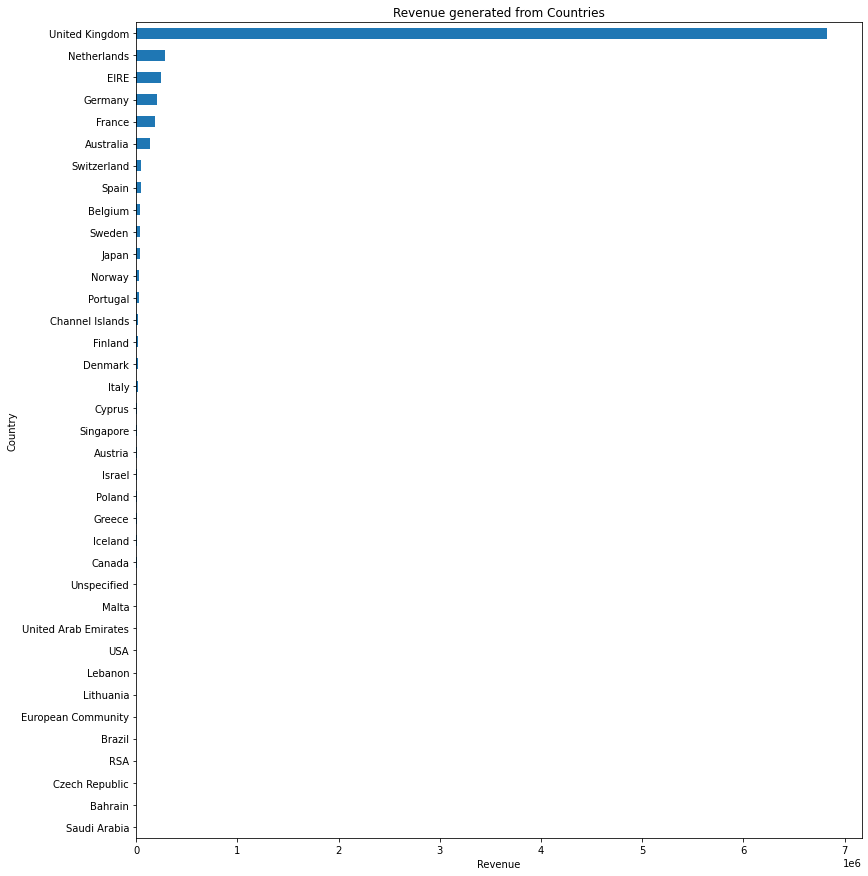

In [ ]:
revenue_per_countries= df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=True)
revenue_per_countries.plot(kind='barh', figsize=(13, 15) )
plt.xlabel('Revenue')
plt.title("Revenue generated from Countries")

Text(0.5, 1.0, 'Number of Invoices per Country')

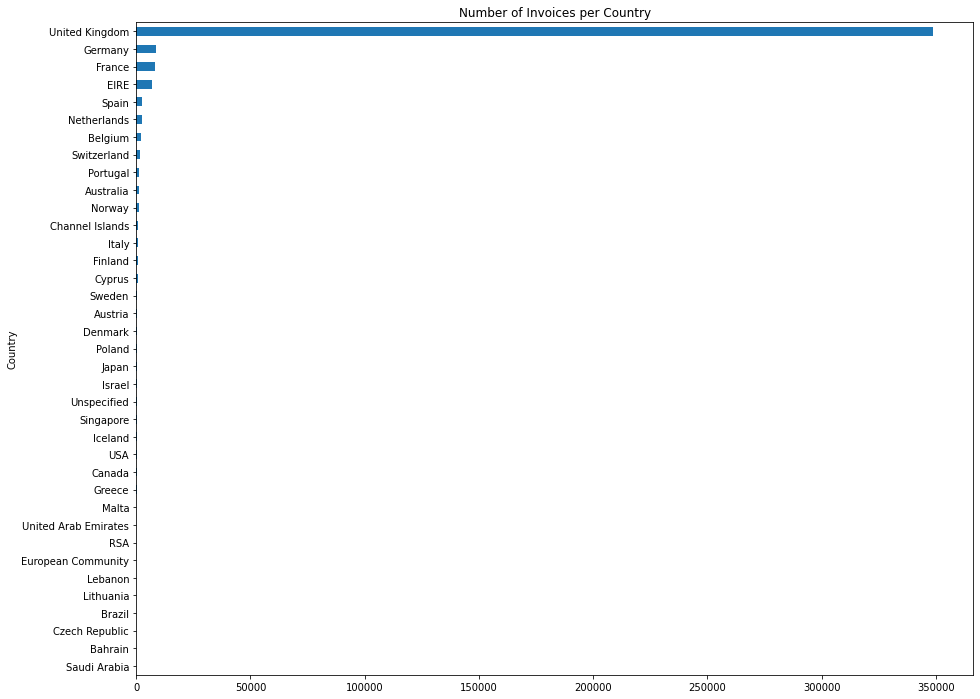

In [ ]:
No_invoice_per_country = df_cleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Number of Invoices per Country")

This is very interesting since we can see that Netherlands is the 2nd country in value even though it has less invoices than countries like Germany or France for example and 10 times less customers. (95, 87 and 9 for Germany, France and Netherlands respectively)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_cleaned['Country']) #LabelEncoder Encode target labels with value between 0 and n_classes-1. It assigns a number to each unique point/class in the target colun

LabelEncoder()

In [ ]:
country=le.classes_
encoding=le.transform(country) 

In [ ]:
dict(zip(country, encoding))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [ ]:
df_cleaned['Country'] = le.transform(df_cleaned['Country']) #replacing the countries with their assigned interger values

In [ ]:
# with open('labelencoder.pickle', 'wb') as g:
#     pickle.dump(le, g)

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34


#The RFM Idea

I'll implement here the RFM principle to classify the customers in this database. This part is inspired by the work of Susan Li. RFM stands for Recency, Frequency and Monetary. It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

In [ ]:
df_cleaned['InvoiceDate'].min()

'1/10/2011 10:32'

In [ ]:
df_cleaned['InvoiceDate'].max()

'9/9/2011 9:52'

In [ ]:
#fixing the date to be one day after the last entry in the dataset
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [ ]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate']) #converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [ ]:
#a InvoiceNo can have multiple products purchased by the customer. E.g. 2 t-shirts, 2 jeans, shirts etc. 
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0] #takes the first InvoiceDate for each group of InvoiceNo because 
#one invoiceNo will be produced on the same date
custom_aggregation["CustomerID"] = lambda x:x.iloc[0] #takes the first CustomerID for each group of InvoiceNo because
# one invoice will be produced for only one customer, so just get the first entry 

custom_aggregation["TotalPrice"] = "sum" # it adds the totalPrice column for each invoiceNo


rfmTable = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation) #agg Aggregates using one or more operations over the specified axis.
#agg accepts a function, list or a dict of function and returns a single value from multiple values taken as input which are grouped together on certain criteria
#agg(fun): fun describes the function that is to be used for aggregation

#agg return a scalar when Series.agg is called with a single function, 
#it is Series when Dataframe.agg is called with a single function, it will be Dataframe when Dataframe.agg is called with several functions.

In [ ]:
##THIS SNIPPET IS NOT RELEVENT TO THE PROJECT## FOR REFERENCE- https://stackoverflow.com/questions/26812763/applying-a-custom-groupby-aggregate-function-to-output-a-binary-outcome-in-panda

#####E.G.
import numpy as np
import pandas as pd

df = pd.DataFrame({'Buy/Sell': [1, 0, 1, 1, 0, 1, 0, 0],
                   'price': [12, 21, 32, 32, 14,56, 67, 89],
                   'Trader': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']})

aggregate={}
aggregate['Buy/Sell']= lambda x:x.iloc[0]
aggregate['price']= lambda x:x.iloc[0]

grouped = df.groupby(['Trader']).agg(aggregate)

print(df)
grouped

   Buy/Sell  price Trader
0         1     12      A
1         0     21      A
2         1     32      B
3         1     32      B
4         0     14      B
5         1     56      C
6         0     67      C
7         0     89      C


,Buy/Sell,price
Trader,,
A,1,12
B,1,32
C,1,56


In [ ]:
rfmTable

,InvoiceDate,CustomerID,TotalPrice
InvoiceNo,,,
536365,2010-12-01 08:26:00,17850.0,139.12
536366,2010-12-01 08:28:00,17850.0,22.20
536367,2010-12-01 08:34:00,13047.0,278.73
536368,2010-12-01 08:34:00,13047.0,70.05
536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...
581583,2011-12-09 12:23:00,13777.0,124.60
581584,2011-12-09 12:25:00,13777.0,140.64
581585,2011-12-09 12:31:00,15804.0,305.65


In [ ]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"] #shows how recent it was from the NOW date
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]") 
#Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.

In [ ]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x) #gives the number of days the purticular customer made purchases
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [ ]:
rfmTable_final

Recency        InvoiceDate TotalPrice
               min    max    <lambda>        sum
CustomerID                                      
12346.0      325.0  325.0           1       0.00
12347.0        2.0  367.0           7    4310.00
12348.0       75.0  358.0           4    1437.24
12349.0       18.0   18.0           1    1457.55
12350.0      310.0  310.0           1     294.40
...            ...    ...         ...        ...
18280.0      277.0  277.0           1     180.60
18281.0      180.0  180.0           1      80.82
18282.0        7.0  126.0           2     176.60
18283.0        3.0  337.0          16    2039.58
18287.0       42.0  201.0           3    1837.28

[4335 rows x 4 columns]

In [ ]:
rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

In [ ]:
rfmTable_final.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,325.0,325.0,1,0.00
12347.0,2.0,367.0,7,4310.00
12348.0,75.0,358.0,4,1437.24
12349.0,18.0,18.0,1,1457.55
12350.0,310.0,310.0,1,294.40


In [ ]:
first_customer = df_cleaned[df_cleaned['CustomerID']==12747]
first_customer.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747.0,35,0,30.60
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747.0,35,0,15.30
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747.0,35,0,27.04
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747.0,35,0,39.60
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747.0,35,0,32.70


In [ ]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'min_recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'max_recency': {0.25: 112.0, 0.5: 248.0, 0.75: 326.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary_value': {0.25: 299.655, 0.5: 653.24, 0.75: 1611.7}}

In [ ]:
segmented_rfm = rfmTable_final

In [ ]:
def RScore(x,p,d): #recency score
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d): #frequecny score
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


"""
25%ile =17, say for frequency, means 25% of people have frequency score less than 17 i.e. they have purchased less than 17 times. 
NOTE: as we increase the %ile, the score also increase

Customers who are falling below 25%tile in min_recency, they are the very recent buyers, assign them '1'
Customers who are falling b/w 25%tile and 50%tile, assign them '2'
Customers who are falling b/w 50 and 5%tile, assign them '3' and 4 to the ones falling b/w 75 and 100%ile

Similarly, the ones who are falling below 25%ile of frequency, the are the ones purchasing the least, therefore assign them '4'
3 to those b/w 25 and 50, 2 to 50 and 75 and 1 to 75 and 100%ile
Same pattern follows for monetary aspect. People falling below 25%ile are the least spenders therefore, assign them '4' and so on. Why 
"""

"\n25%ile =17, say for frequency, means 25% of people have frequency score less than 17 i.e. they have purchased less than 17 times. \nNOTE: as we increase the %ile, the score also increase\n\nCustomers who are falling below 25%tile in min_recency, they are the very recent buyers, assign them '1'\nCustomers who are falling b/w 25%tile and 50%tile, assign them '2'\nCustomers who are falling b/w 50 and 5%tile, assign them '3' and 4 to the ones falling b/w 75 and 100%ile\n\nSimilarly, the ones who are falling below 25%ile of frequency, the are the ones purchasing the least, therefore assign them '4'\n3 to those b/w 25 and 50, 2 to 50 and 75 and 1 to 75 and 100%ile\nSame pattern follows for monetary aspect. People falling below 25%ile are the least spenders therefore, assign them '4' and so on. Why \n"

Here we'll apply a score on each feature of RFM



In [ ]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346.0,325.0,325.0,1,0.00,4,4,4
12347.0,2.0,367.0,7,4310.00,1,1,1
12348.0,75.0,358.0,4,1437.24,3,2,2
12349.0,18.0,18.0,1,1457.55,2,4,2
12350.0,310.0,310.0,1,294.40,4,4,4


Finally we'll set a score for each customer in the database.



In [ ]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325.0,325.0,1,0.00,4,4,4,444
12347.0,2.0,367.0,7,4310.00,1,1,1,111
12348.0,75.0,358.0,4,1437.24,3,2,2,322
12349.0,18.0,18.0,1,1457.55,2,4,2,242
12350.0,310.0,310.0,1,294.40,4,4,4,444


In [ ]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False)

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646.0,1.0,354.0,73,278742.02,1,1,1,111
18102.0,0.0,367.0,60,259657.30,1,1,1,111
17450.0,8.0,367.0,46,193417.63,1,1,1,111
14911.0,1.0,373.0,198,131009.71,1,1,1,111
14156.0,9.0,371.0,54,113728.45,1,1,1,111
...,...,...,...,...,...,...,...,...
12528.0,9.0,312.0,6,1640.48,1,1,1,111
15024.0,9.0,367.0,10,1636.43,1,1,1,111
12423.0,0.0,353.0,8,1624.11,1,1,1,111


Here we have an example of customers with a score of 111 which means that they are classified as our best customers.

In [ ]:
segmented_rfm = segmented_rfm.reset_index()

In [ ]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [ ]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value',
       'r_quartile', 'f_quartile', 'm_quartile', 'RFMScore'],
      dtype='object')

We don't need the quartiles anymore, let's drop them.



In [ ]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

Information on RFM:

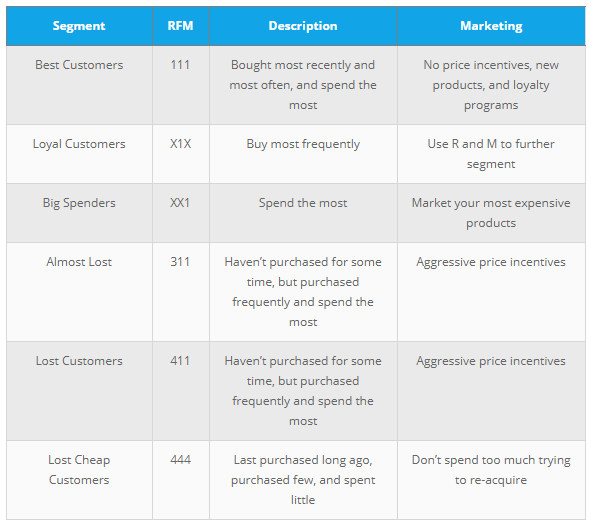

#Time Features

I'll now create some time features, although I might not use them. It could be interesting to see if there are any paterns due to seasonality.

In [ ]:
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [ ]:
df_cleaned['Month'].value_counts()

11    62949
10    48613
12    42536
9     39510
5     27962
6     26820
3     26752
8     26688
7     26476
4     22347
1     20899
2     19631
Name: Month, dtype: int64

In [ ]:
df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].map(lambda x: x.weekday())
df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,0,15.30,372.0,373.0,34,5322.84,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,372.0,373.0,34,5322.84,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,0,22.00,372.0,373.0,34,5322.84,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,372.0,373.0,34,5322.84,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,372.0,373.0,34,5322.84,411,12,2,1,8


#Product Category

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import nltk
nltk.download('stopwords')
#TF-IDF stands for Term Frequency Inverse Document Frequency of records

"""
TFI-DF vectorizers creates a matrix with first rows having the unique terms in the corpus and columns representing the documents.
In our case, the corpus is the collection of all product decriptions and a document is each unique product description. TFI_DF helps in feature extraction

A[i, j] entry of TFI-DF matrix represents the number of times ith word appeared in jth document 
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'\nTFI-DF vectorizers creates a matrix with first rows having the unique terms in the corpus and columns representing the documents.\nIn our case, the corpus is the collection of all product decriptions and a document is each unique product description\n\nA[i, j] entry of TFI-DF matrix represents the number of times ith word appeared in jth document \n'

In [ ]:
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer() #stemmer gives the root form of a term e.f. running is converted into 'run' etc.
stopword = nltk.corpus.stopwords.words('english') #stopwords are not meaningful in their own e.g. the, and, of etc.

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()] # a token is an individual term/word

analyzer = TfidfVectorizer().build_analyzer() #TfidfVectorizer- Convert a collection of raw documents to a matrix of TF-IDF features.
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X) #'X' contains the product descriptions of our dataset, it will stem the words, consider them only if the tokens/words have just letters,
#converts all the terms to lowercase, removes the stopwords, and removes a word if it appears more than 30% of the total tokens
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [ ]:
feature_names = CV.get_feature_names_out()
feature_names

array(['abc', 'abstract', 'acapulco', ..., 'your', 'yuletid', 'zinc'],
      dtype=object)

In [ ]:
from sklearn.decomposition import TruncatedSVD
"""
This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 
Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. 
This means it can work with sparse matrices efficiently.
"""
from sklearn.preprocessing import Normalizer
svd = TruncatedSVD(n_components = 100) # 100 represents Desired dimensionality of output data. 
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix) # reduces the dimension of TFI-DF matrix
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [ ]:
TF_IDF_matrix

<3871x1694 sparse matrix of type '<class 'numpy.float64'>'
	with 16277 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

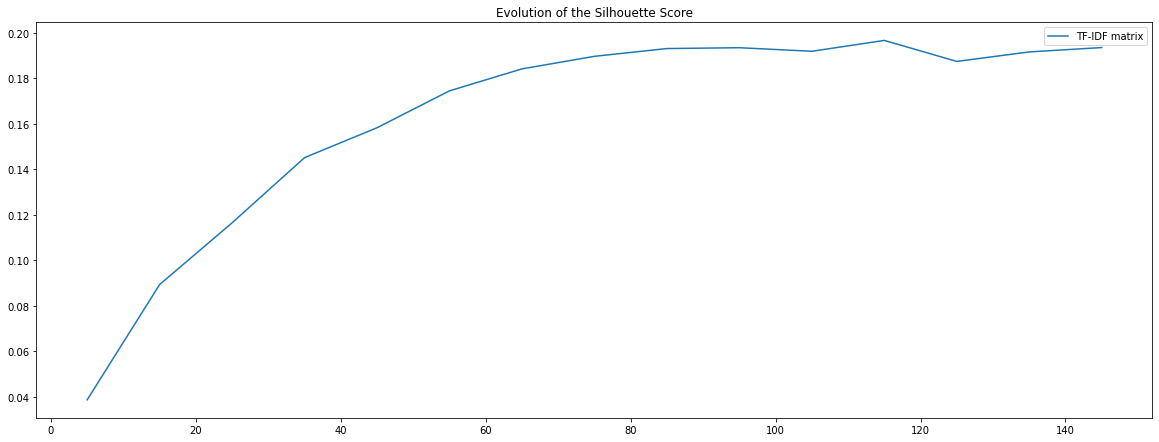

In [ ]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

The highest value for the silhouette score is when there are 115 clusters. So we'll chose this value

Text(0.5, 1.0, 'ACP with 135 clusters')

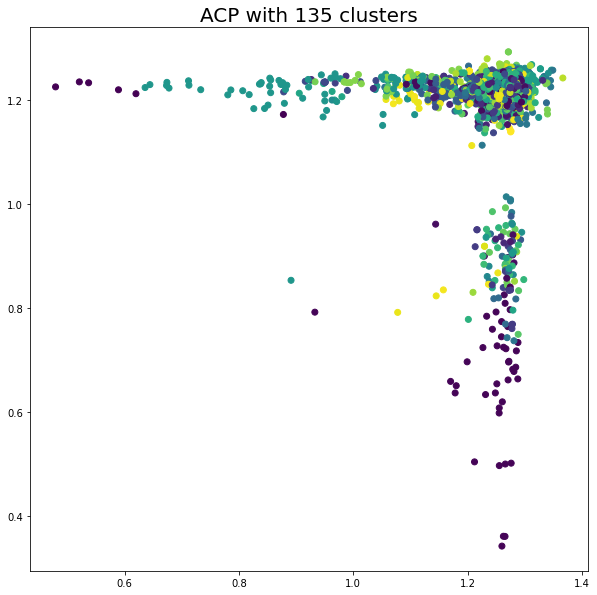

In [ ]:
n_clusters = 115

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 115 clusters", fontsize="20")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

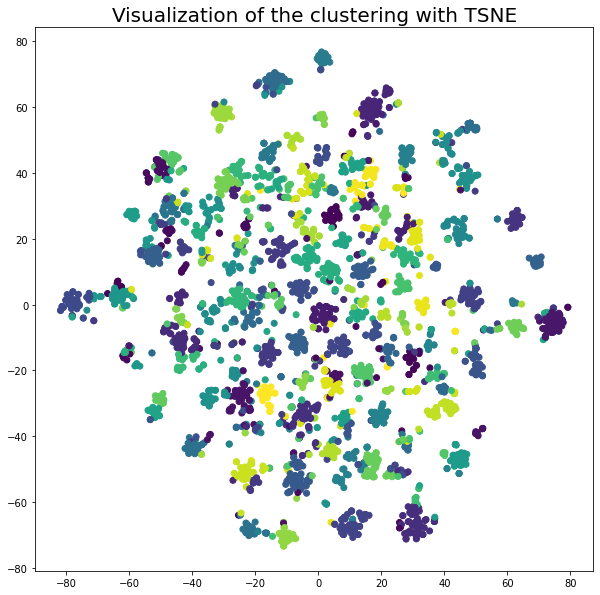

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #TSNE helps vizualizing large dimension dataset into 2D (n_components)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

<Figure size 432x288 with 0 Axes>

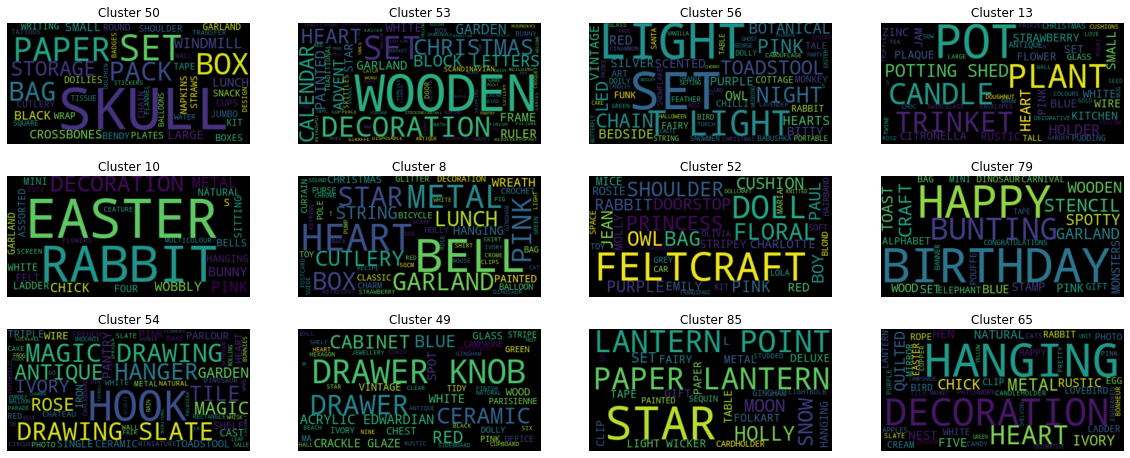

<Figure size 432x288 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
import random

plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

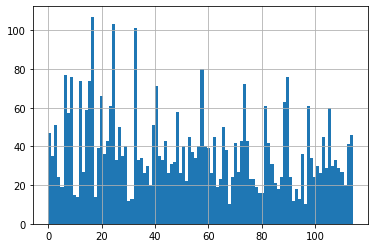

In [ ]:
pd.Series(clusters).hist(bins=100)

In [ ]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}
"""
'clusters' contains the assignment of each description (in 'X') to a cluster number

dict_article_to_cluster- maps all the descriptions to the clusters
"""

"\n'clusters' contains the assignment of each description (in 'X') to a cluster number\n\ndict_article_to_cluster- maps all the descriptions to the clusters\n"

In [ ]:
dict_article_to_cluster

{'WHITE HANGING HEART T-LIGHT HOLDER': 76,
 'WHITE METAL LANTERN': 1,
 'CREAM CUPID HEARTS COAT HANGER': 99,
 'KNITTED UNION FLAG HOT WATER BOTTLE': 47,
 'RED WOOLLY HOTTIE WHITE HEART.': 1,
 'SET 7 BABUSHKA NESTING BOXES': 16,
 'GLASS STAR FROSTED T-LIGHT HOLDER': 11,
 'HAND WARMER UNION JACK': 89,
 'HAND WARMER RED POLKA DOT': 69,
 'EDWARDIAN PARASOL RED': 69,
 'RETRO COFFEE MUGS ASSORTED': 105,
 'SAVE THE PLANET MUG': 105,
 'VINTAGE BILLBOARD DRINK ME MUG': 105,
 'VINTAGE BILLBOARD LOVE/HATE MUG': 105,
 'WOOD 2 DRAWER CABINET WHITE FINISH': 49,
 'WOOD S/3 CABINET ANT WHITE FINISH': 1,
 'WOODEN PICTURE FRAME WHITE FINISH': 53,
 'WOODEN FRAME ANTIQUE WHITE ': 53,
 'EDWARDIAN PARASOL BLACK': 21,
 'IVORY EMBROIDERED QUILT ': 104,
 'JUMBO SHOPPER VINTAGE RED PAISLEY': 88,
 'ASSORTED COLOUR BIRD ORNAMENT': 22,
 "POPPY'S PLAYHOUSE BEDROOM ": 102,
 "POPPY'S PLAYHOUSE KITCHEN": 102,
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 52,
 'IVORY KNITTED MUG COSY ': 105,
 'BOX OF 6 ASSORTED COLOUR TEASPOON

In [ ]:
# with open('product_clusters.pickle', 'wb') as h:
#     pickle.dump(dict_article_to_cluster, h)

#creating customer categories

In [ ]:
cluster = df_cleaned['Description'].apply(lambda x : dict_article_to_cluster[x]) #mapping all the descriptions in dataset to the cluster
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(df_cleaned["TotalPrice"], 0) #multiplying all the rows with corresponding totalPrice
"""
get_dummies- It converts categorical data into dummy or indicator variables. Converts into one hot-encoding
cluster- whose data is to be manipulated.
prefix- String to append DataFrame column names
df.mul- Get Multiplication of dataframe and other, element-wise (binary operator mul).
"""
df2 = pd.concat([df_cleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum() #adding the amount for all the invoiceNo groups
#moreover, one invoice can have multiple products and hence multiple descriptions, therefore, one InvoiceNo can belong to multiple clusters

In [ ]:
df2 

,InvoiceNo,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
0,536365,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536365,0.0,20.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536365,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536365,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536365,0.0,20.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391178,581578,0.0,0.00,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391179,581578,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391180,581578,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391181,581578,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]


df_grouped = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)
"""
For each invoiceNo, we are retrieving its total price, min_freq, max_freq, frequency, customerID etc.
"""

'\nFor each invoiceNo, we are retrieving its total price, min_freq, max_freq, frequency, customerID etc.\n'

In [ ]:
df_grouped

,TotalPrice,min_recency,max_recency,frequency,monetary_value,CustomerID,Quantity,Country
InvoiceNo,,,,,,,,
536365,15.30,372.0,373.0,34,5322.84,17850.0,40,35
536366,11.10,372.0,373.0,34,5322.84,17850.0,12,35
536367,54.08,56.0,373.0,9,3105.70,13047.0,83,35
536368,25.50,56.0,373.0,9,3105.70,13047.0,15,35
536369,17.85,56.0,373.0,9,3105.70,13047.0,3,35
...,...,...,...,...,...,...,...,...
581583,58.00,0.0,373.0,33,25893.04,13777.0,76,35
581584,51.84,0.0,373.0,33,25893.04,13777.0,120,35
581585,4.68,0.0,198.0,13,3886.59,15804.0,278,35


**Final dataset grouped by customers**

In [ ]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()

In [ ]:
df2_grouped_final

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
12347.0,0.0,12.60,201.6,0.0,0.0,22.50,0.00,0.0,17.40,39.80,...,0.00,0.00,79.20,22.50,0.0,0.0,0.0,15.00,0.0,0.00
12348.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
12349.0,0.0,39.95,0.0,0.0,0.0,17.85,6.64,0.0,17.40,58.98,...,16.80,0.00,34.65,0.00,0.0,0.0,0.0,0.00,0.0,63.80
12350.0,0.0,0.00,0.0,0.0,0.0,40.20,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,18.7,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,23.70,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
18281.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
18282.0,0.0,0.00,17.7,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00


In [ ]:
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
"""
 dataframe.div() is used to find the floating division of the dataframe and other element-wise.
 df2_grouped_final.sum(axis=1) : Series, DataFrame, or constant 
 axis : For Series input, axis to match Series index on 
 diving each cluster value by the sum of all the cluster values for a particular customer
"""
df2_grouped_final = df2_grouped_final.fillna(0)

In [ ]:
df2_grouped_final

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
12347.0,0.0,0.002923,0.046775,0.0,0.0,0.005220,0.000000,0.0,0.004037,0.009234,...,0.000000,0.000000,0.018376,0.005220,0.000000,0.000000,0.0,0.003480,0.0,0.000000
12348.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
12349.0,0.0,0.027409,0.000000,0.0,0.0,0.012247,0.004556,0.0,0.011938,0.040465,...,0.011526,0.000000,0.023773,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.043772
12350.0,0.0,0.000000,0.000000,0.0,0.0,0.136549,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.063519,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.131229,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
18281.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
18282.0,0.0,0.000000,0.100227,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [ ]:
df_grouped

,TotalPrice,min_recency,max_recency,frequency,monetary_value,CustomerID,Quantity,Country
InvoiceNo,,,,,,,,
536365,15.30,372.0,373.0,34,5322.84,17850.0,40,35
536366,11.10,372.0,373.0,34,5322.84,17850.0,12,35
536367,54.08,56.0,373.0,9,3105.70,13047.0,83,35
536368,25.50,56.0,373.0,9,3105.70,13047.0,15,35
536369,17.85,56.0,373.0,9,3105.70,13047.0,3,35
...,...,...,...,...,...,...,...,...
581583,58.00,0.0,373.0,33,25893.04,13777.0,76,35
581584,51.84,0.0,373.0,33,25893.04,13777.0,120,35
581585,4.68,0.0,198.0,13,3886.59,15804.0,278,35


In [ ]:
df_grouped_final.head(5)

TotalPrice                   min_recency max_recency frequency  \
                  min    max       mean    <lambda>    <lambda>  <lambda>   
CustomerID                                                                  
12346.0           0.0    0.0   0.000000       325.0       325.0         1   
12347.0          13.2   45.0  23.308571         2.0       367.0         7   
12348.0          39.6  150.0  82.840000        75.0       358.0         4   
12349.0          15.0   15.0  15.000000        18.0        18.0         1   
12350.0          25.2   25.2  25.200000       310.0       310.0         1   

           monetary_value Quantity  Country  
                 <lambda>      sum <lambda>  
CustomerID                                   
12346.0              0.00    74215       35  
12347.0           4310.00     2458       16  
12348.0           1437.24     2332       12  
12349.0           1457.55      630       18  
12350.0            294.40      196       24

In [ ]:
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]

In [ ]:
df_grouped_final.head(5)

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346.0,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347.0,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348.0,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349.0,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350.0,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [ ]:
df2_grouped_final.head(5)


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000
12347.0,0.0,0.002923,0.046775,0.0,0.0,0.005220,0.000000,0.0,0.004037,0.009234,...,0.000000,0.0,0.018376,0.00522,0.0,0.000000,0.0,0.00348,0.0,0.000000
12348.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000
12349.0,0.0,0.027409,0.000000,0.0,0.0,0.012247,0.004556,0.0,0.011938,0.040465,...,0.011526,0.0,0.023773,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.043772
12350.0,0.0,0.000000,0.000000,0.0,0.0,0.136549,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.063519,0.0,0.00000,0.0,0.000000


**Clustering customers**

In [ ]:
from sklearn.preprocessing import StandardScaler
X1 = df_grouped_final.to_numpy()
X2 = df2_grouped_final.to_numpy()

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

In [ ]:
X_final_std_scale

array([[-0.22368958, -0.31677197, -0.30958834, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09508977, -0.11550268, -0.12598038, ...,  0.00348028,
         0.        ,  0.        ],
       [ 0.16210986,  0.35412568,  0.34296491, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.09947385, -0.20271937, -0.15893551, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21540853, -0.23760605, -0.27672535, ...,  0.        ,
         0.        ,  0.01027172],
       [-0.124317  , -0.11550268, -0.09847744, ...,  0.00757642,
         0.        ,  0.        ]])

In [ ]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.8856639689093246 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.8738898571993515 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.2536748785456721 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.30298062261739367 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.38942471093073633 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.39773519673168584 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.405604629062151 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.4098442802956929 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.40849825075363255 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.40772496566481536 with Std Scaling


We want to have at least 5, 6 clusters so we won't take 2 or 3 clusters even though they have the highest silhouette scores, 8 clusters would fit the best here.

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

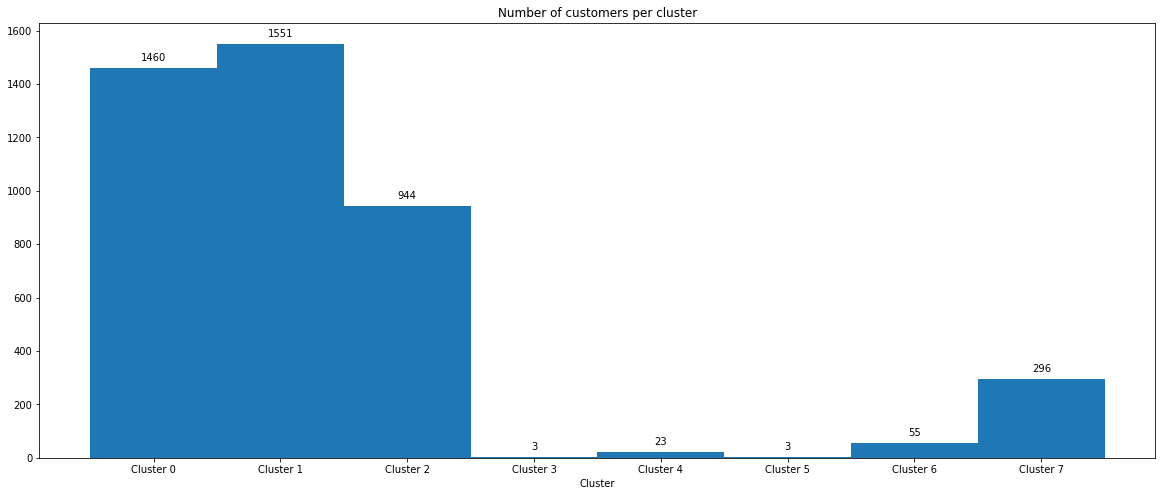

In [ ]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)


In [ ]:
df_grouped_final["cluster"] = clusters
"""
clusters- contains the mapping of each customer to a cluster. We are adding this mapping to the datafrane
"""

'\nclusters- contains the mapping of each customer to a cluster. We are adding this mapping to the datafrane\n'

In [ ]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,4,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000
12347.0,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,7,...,0.000000,0.0,0.018376,0.00522,0.0,0.000000,0.0,0.00348,0.0,0.000000
12348.0,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,7,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000
12349.0,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,7,...,0.011526,0.0,0.023773,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.043772
12350.0,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,2,...,0.000000,0.0,0.000000,0.00000,0.0,0.063519,0.0,0.00000,0.0,0.000000


In [ ]:
final_dataset_V2 = final_dataset.reset_index()

In [ ]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [ ]:
# with open('df_cleaned.pickle', 'wb') as f:
#     pickle.dump(df_cleaned, f)


**Cluster Interpretation**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

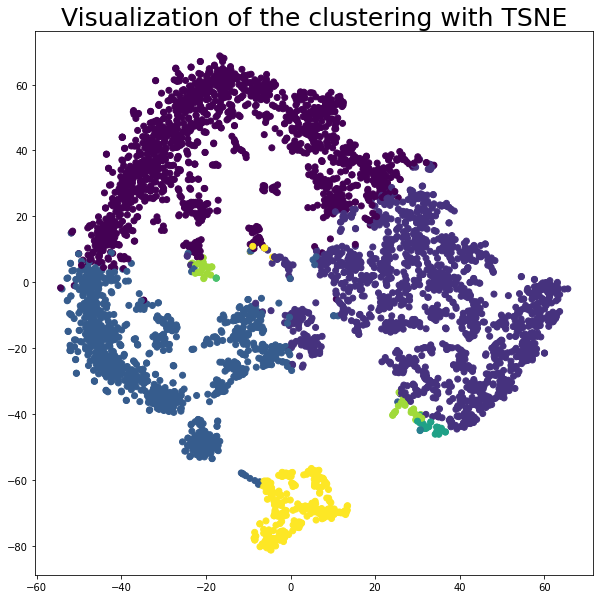

In [ ]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

Graphically the clusters are distinctive enough. Let's take a closer look at the clusters that contain few customers.

**Cluster 0**

In [ ]:
final_dataset[final_dataset['cluster']==0]

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_105,Cluster_106,Cluster_107,Cluster_108,Cluster_109,Cluster_110,Cluster_111,Cluster_112,Cluster_113,Cluster_114
CustomerID,,,,,,,,,,,,,,,,,,,,,
12357.0,19.80,19.80,19.800000,33.0,33.0,1,6207.67,2708,32,0,...,0.020703,0.000000,0.000000,0.003222,0.000000,0.000000,0.0,0.000000,0.0,0.000000
12371.0,5.04,5.04,5.040000,59.0,59.0,1,1527.96,582,32,0,...,0.139009,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
12378.0,12.60,12.60,12.600000,129.0,129.0,1,4008.62,2529,32,0,...,0.008831,0.000000,0.003742,0.043846,0.005837,0.012723,0.0,0.004969,0.0,0.011101
12381.0,15.00,29.70,21.533333,4.0,119.0,3,1433.46,797,24,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.008790
12384.0,15.00,25.00,20.000000,28.0,121.0,2,406.16,122,32,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.055397,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276.0,99.00,99.00,99.000000,43.0,43.0,1,329.61,186,35,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
18277.0,17.85,17.85,17.850000,58.0,58.0,1,110.38,68,35,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
18278.0,17.00,17.00,17.000000,73.0,73.0,1,173.90,66,35,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.058654,0.0,0.000000


In [ ]:
final_dataset[final_dataset['cluster']==0].mean()

min            20.309192
max            33.393767
mean           25.999122
min_recency    49.811644
max_recency    86.663014
                 ...    
Cluster_110     0.002237
Cluster_111     0.000777
Cluster_112     0.008585
Cluster_113     0.001367
Cluster_114     0.009907
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()

In [ ]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [ ]:
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity               9.047161
UnitPrice              2.692533
QuantityCanceled       0.077637
TotalPrice            13.595011
frequency              3.080386
min_recency           36.051028
monetary_value      1186.711745
dtype: float64

In [ ]:
cluster0['Description'].value_counts()[:10]

PAPER CHAIN KIT 50'S CHRISTMAS        270
BAKING SET 9 PIECE RETROSPOT          263
WHITE HANGING HEART T-LIGHT HOLDER    250
ASSORTED COLOUR BIRD ORNAMENT         248
REX CASH+CARRY JUMBO SHOPPER          225
HOT WATER BOTTLE KEEP CALM            216
REGENCY CAKESTAND 3 TIER              211
RABBIT NIGHT LIGHT                    201
GARDENERS KNEELING PAD KEEP CALM      195
SPOTTY BUNTING                        191
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [ ]:
cluster0_grouped['RFMScore'].value_counts().head(5)

344    200
244    139
343    135
243     87
222     64
Name: RFMScore, dtype: int64

In [ ]:
cluster0_grouped['Country'].value_counts()

35    1413
30      10
32       8
24       7
26       7
31       4
33       3
25       3
36       2
27       1
34       1
23       1
Name: Country, dtype: int64

In [ ]:
cluster0['Month'].value_counts()

11    20796
10    17082
9     10933
7      5056
8      4975
12     4905
6      2859
5      1416
Name: Month, dtype: int64

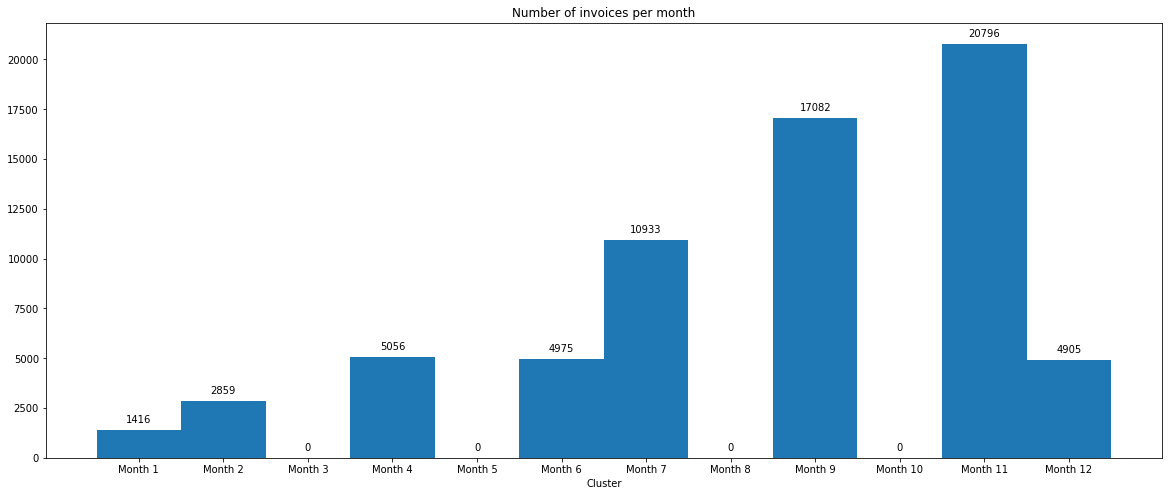

In [ ]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [ ]:
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

Series([], Name: Year, dtype: int64)

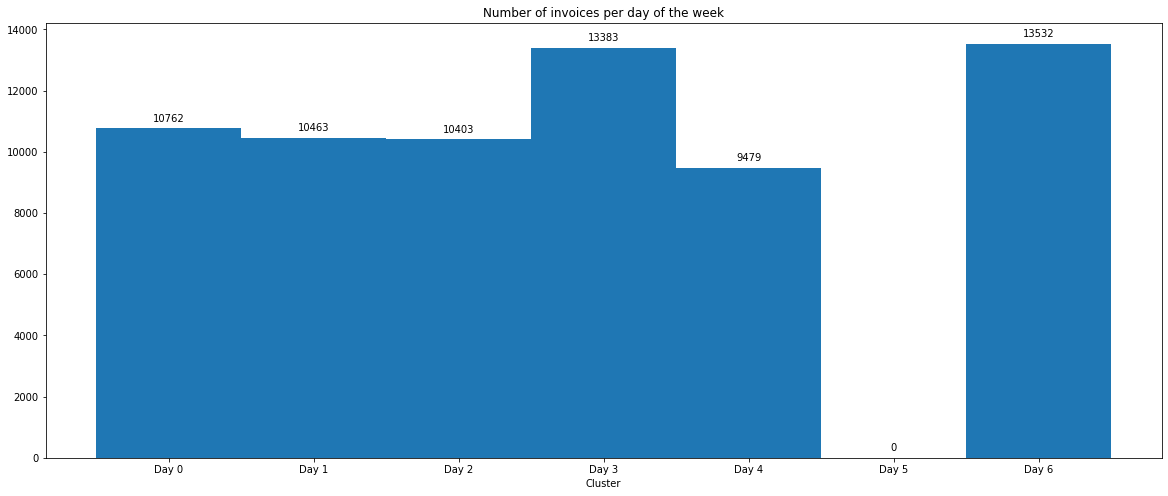

In [ ]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)


In [ ]:
cluster0['Day'].nunique()

31

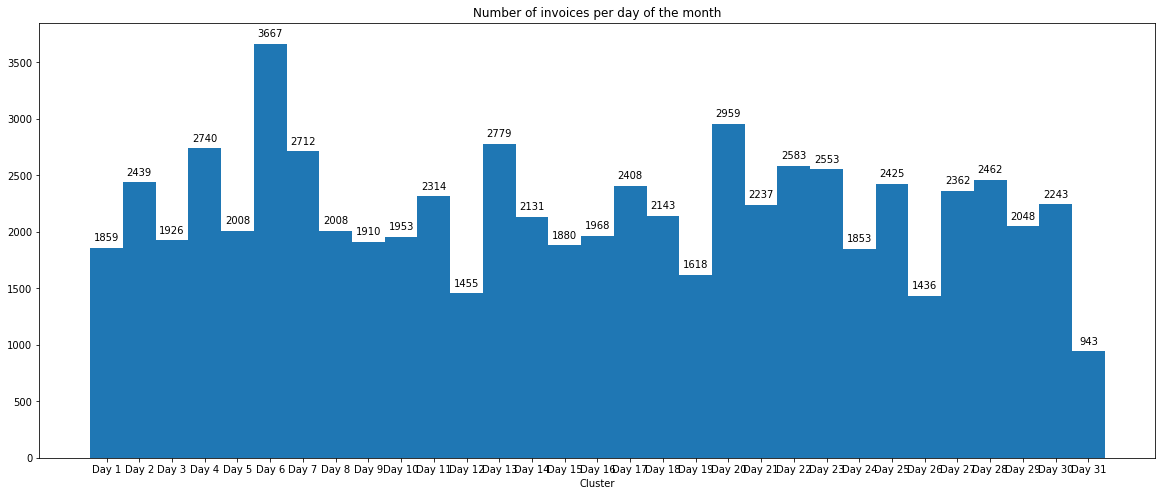

In [ ]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day'], bins=31)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1,32)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [ ]:
cluster0['Hour'].nunique()

15

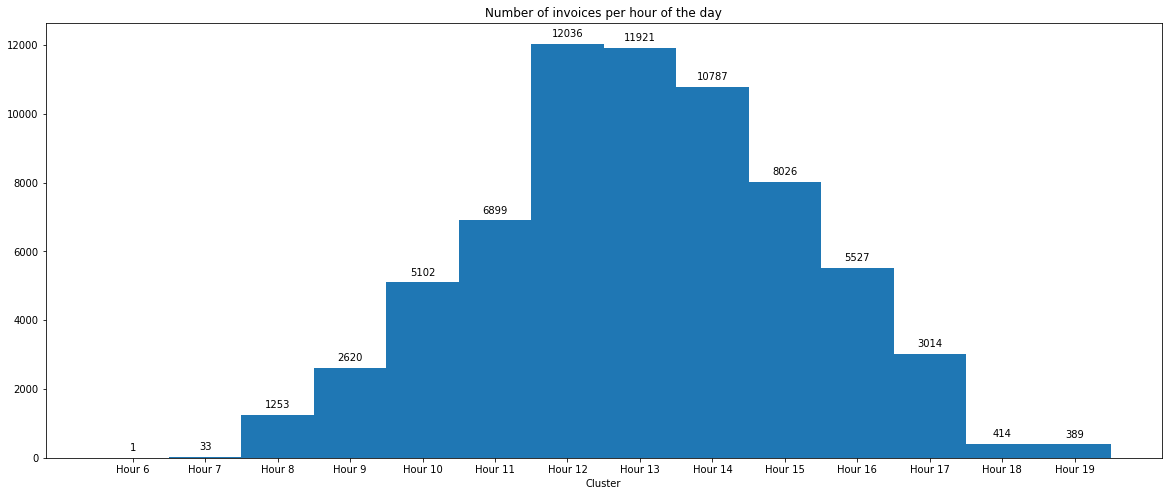

In [ ]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Hour'], bins=14)
plt.xlabel("Cluster")
plt.title("Number of invoices per hour of the day")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Hour {}".format(x) for x in (sorted(cluster0['Hour'].unique()))])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

The customers of this group have not purchased lately, are the least spenders with low frequency. Most of the customers have the RMFScore of 344, 244, 343, 243.

Key figures (averages):

* Quantity               9.047161
* UnitPrice              2.692533
* QuantityCanceled       0.077637
* TotalPrice            13.595011
* frequency              3.080386
* min_recency           36.051028
* monetary_value      1186.711745

Min Basket Price: 20.3

Mean Basket Price: 25.9

Max Basket Price: 33.3


**TOP 10 bought products :**

  BAKING SET 9 PIECE RETROSPOT          263

  WHITE HANGING HEART T-LIGHT HOLDER    250

  ASSORTED COLOUR BIRD ORNAMENT         248

  REX CASH+CARRY JUMBO SHOPPER          225

  HOT WATER BOTTLE KEEP CALM            216

  REGENCY CAKESTAND 3 TIER              211

  RABBIT NIGHT LIGHT                    201

  GARDENERS KNEELING PAD KEEP CALM      195

  SPOTTY BUNTING                        191





**Cluster 1**

In [ ]:
final_dataset[final_dataset['cluster']==1].mean()

min             10.373488
max             71.196802
mean            31.186975
min_recency     36.564797
max_recency    312.156673
                  ...    
Cluster_110      0.002242
Cluster_111      0.000760
Cluster_112      0.006872
Cluster_113      0.000827
Cluster_114      0.008146
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust1 = list(temp_final_df[temp_final_df['cluster']==1]['CustomerID'])
cluster1 = df_cleaned[df_cleaned['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity              10.268091
UnitPrice              2.899498
QuantityCanceled       0.128702
TotalPrice            17.437493
frequency             11.192367
min_recency           24.465389
monetary_value      5547.580530
dtype: float64

In [ ]:
cluster1['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1349
JUMBO BAG RED RETROSPOT               1089
REGENCY CAKESTAND 3 TIER               977
PARTY BUNTING                          932
ASSORTED COLOUR BIRD ORNAMENT          928
LUNCH BAG RED RETROSPOT                902
LUNCH BAG  BLACK SKULL.                754
SET OF 3 CAKE TINS PANTRY DESIGN       729
LUNCH BAG CARS BLUE                    679
LUNCH BAG PINK POLKADOT                678
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster1_grouped = cluster1.groupby("CustomerID").agg(custom_aggregation)
cluster1_grouped['RFMScore'].value_counts().head(5)

111    363
211    156
322    122
222    118
122     97
Name: RFMScore, dtype: int64

This cluster consists of our most valuable customers who have purchased recently. They purchase frequently and spend big. The most representative RMFScore of the cluster is- 111, 211, 322, 222. 

**Key Figures:**
min spending            10.373488

max spending            71.196802

mean spending           31.186975

Quantity              10.268091

UnitPrice              2.899498

QuantityCanceled       0.128702

TotalPrice            17.437493

frequency             11.192367

min_recency           24.465389

monetary_value      5547.580530

**Cluster 2**

In [ ]:
final_dataset[final_dataset['cluster']==2].mean()

min             23.637097
max             35.170350
mean            28.951717
min_recency    250.860169
max_recency    281.849576
                  ...    
Cluster_110      0.002852
Cluster_111      0.000982
Cluster_112      0.006998
Cluster_113      0.001895
Cluster_114      0.008873
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust2 = list(temp_final_df[temp_final_df['cluster']==2]['CustomerID'])
cluster2 = df_cleaned[df_cleaned['CustomerID'].isin(cust2)]
cluster2[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity              8.290659
UnitPrice             3.381161
QuantityCanceled      0.125477
TotalPrice           15.175394
frequency             2.656547
min_recency         236.683416
monetary_value      860.334882
dtype: float64

In [ ]:
cluster2['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    230
REGENCY CAKESTAND 3 TIER              188
PARTY BUNTING                         138
ASSORTED COLOUR BIRD ORNAMENT         129
JAM MAKING SET WITH JARS              104
REX CASH+CARRY JUMBO SHOPPER          103
NATURAL SLATE HEART CHALKBOARD        103
SET OF 3 CAKE TINS PANTRY DESIGN      101
HEART OF WICKER SMALL                  98
HEART OF WICKER LARGE                  86
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster2_grouped = cluster2.groupby("CustomerID").agg(custom_aggregation)
cluster2_grouped['RFMScore'].value_counts().head(5)

444    398
443    181
433     96
434     55
432     49
Name: RFMScore, dtype: int64

This cluster consists of mostly lost customers who had purchased long ago, they don't buy very frequently and spend very less. The most representative RMFScore is 444, 443, 433 and 434. 

**Key Figures**

min spending             23.637097

max spending             35.170350

mean spending            28.951717

Quantity              8.290659

UnitPrice             3.381161

QuantityCanceled      0.125477

TotalPrice           15.175394

frequency             2.656547

min_recency         236.683416

monetary_value      860.334882

**Cluster 3**

In [ ]:
final_dataset[final_dataset['cluster']==3].mean()

min              13.120000
max            3812.360000
mean            513.055091
min_recency       3.000000
max_recency     362.666667
                  ...     
Cluster_110       0.000745
Cluster_111       0.000460
Cluster_112       0.002061
Cluster_113       0.000000
Cluster_114       0.002784
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust3 = list(temp_final_df[temp_final_df['cluster']==3]['CustomerID'])
cluster3 = df_cleaned[df_cleaned['CustomerID'].isin(cust3)]
cluster3[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity               117.102437
UnitPrice                2.829152
QuantityCanceled         0.170964
TotalPrice             258.501219
frequency               67.816319
min_recency              1.678559
monetary_value      265709.695959
dtype: float64

In [ ]:
cluster3['Description'].value_counts()[:10]

SPACEBOY LUNCH BOX                     25
ROUND SNACK BOXES SET OF4 WOODLAND     24
CREAM HEART CARD HOLDER                22
WOOD BLACK BOARD ANT WHITE FINISH      19
DOLLY GIRL LUNCH BOX                   19
ROUND SNACK BOXES SET OF 4 FRUITS      17
BLACK HEART CARD HOLDER                17
SPACEBOY BIRTHDAY CARD                 16
JUMBO BAG RED RETROSPOT                15
WOODLAND CHARLOTTE BAG                 15
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster3_grouped = cluster3.groupby("CustomerID").agg(custom_aggregation)
cluster3_grouped['RFMScore'].value_counts().head(5)

111    3
Name: RFMScore, dtype: int64

This group's customers are the **best customers** who have purchased recently, buy frequently and spend big. The most representative RMFScore is 111

**Key Figures**

min spending              13.120000

max spending            3812.360000

mean spending            513.055091

Quantity               117.102437

UnitPrice                2.829152

QuantityCanceled         0.170964

TotalPrice             258.501219

frequency               67.816319

min_recency              1.678559

monetary_value      265709.695959

**Cluster 4**

In [ ]:
final_dataset[final_dataset['cluster']==4].mean()

min              4.885217
max            645.545652
mean           145.298084
min_recency     19.739130
max_recency    360.000000
                  ...    
Cluster_110      0.002485
Cluster_111      0.000256
Cluster_112      0.004828
Cluster_113      0.000300
Cluster_114      0.005645
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust4 = list(temp_final_df[temp_final_df['cluster']==4]['CustomerID'])
cluster4 = df_cleaned[df_cleaned['CustomerID'].isin(cust4)]
cluster4[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity               29.465542
UnitPrice               2.624968
QuantityCanceled        5.342063
TotalPrice             37.166595
frequency             121.823589
min_recency             2.675888
monetary_value      61843.237983
dtype: float64

In [ ]:
cluster4['Description'].value_counts()[:10]

JUMBO BAG RED RETROSPOT               152
REGENCY CAKESTAND 3 TIER              148
WHITE HANGING HEART T-LIGHT HOLDER    131
CHILLI LIGHTS                         115
JUMBO BAG PINK POLKADOT                98
PAPER BUNTING RETROSPOT                97
LUNCH BAG  BLACK SKULL.                95
GUMBALL COAT RACK                      94
LUNCH BAG RED RETROSPOT                93
JUMBO BAG STRAWBERRY                   90
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster4_grouped = cluster4.groupby("CustomerID").agg(custom_aggregation)
cluster4_grouped['RFMScore'].value_counts().head(5)

111    19
211     2
444     1
134     1
Name: RFMScore, dtype: int64

This Group has the our most valuable customers who spend big, purchase frequently and purchased recently. Most representative RMFScore- 111

**Key Figures**

min spending              4.885217

max spending            645.545652

mean spending           145.298084

Quantity               29.465542

UnitPrice               2.624968

QuantityCanceled        5.342063

TotalPrice             37.166595

frequency             121.823589

min_recency             2.675888

monetary_value      61843.237983

**Cluster 5**

In [ ]:
final_dataset[final_dataset['cluster']==5].mean()

min            3386.640000
max            3386.640000
mean           3386.640000
min_recency     162.666667
max_recency     162.666667
                  ...     
Cluster_110       0.000000
Cluster_111       0.000000
Cluster_112       0.000000
Cluster_113       0.000000
Cluster_114       0.000000
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust5 = list(temp_final_df[temp_final_df['cluster']==5]['CustomerID'])
cluster5 = df_cleaned[df_cleaned['CustomerID'].isin(cust5)]
cluster5[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity            3203.333333
UnitPrice              1.430000
QuantityCanceled       0.000000
TotalPrice          3386.640000
frequency              1.000000
min_recency          162.666667
monetary_value      3386.640000
dtype: float64

In [ ]:
cluster5['Description'].value_counts()[:10]

EMPIRE DESIGN ROSETTE              1
SMALL POPCORN HOLDER               1
METAL SIGN TAKE IT OR LEAVE IT     1
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster5_grouped = cluster5.groupby("CustomerID").agg(custom_aggregation)
cluster5_grouped['RFMScore'].value_counts().head(5)

441    2
141    1
Name: RFMScore, dtype: int64

This groups customers are **big spenders** but they rarely purchase.

**Key Figures**
min spending            3386.640000

max spending            3386.640000

mean spending          3386.640000

Quantity            3203.333333

UnitPrice              1.430000

QuantityCanceled       0.000000

TotalPrice          3386.640000

frequency              1.000000

min_recency          162.666667

monetary_value      3386.640000

**Cluster 6**

In [ ]:
final_dataset[final_dataset['cluster']==6].mean()

min             274.662182
max            1098.225091
mean            575.658407
min_recency      96.981818
max_recency     242.181818
                  ...     
Cluster_110       0.000079
Cluster_111       0.000000
Cluster_112       0.000340
Cluster_113       0.000045
Cluster_114       0.002196
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust6 = list(temp_final_df[temp_final_df['cluster']==6]['CustomerID'])
cluster6 = df_cleaned[df_cleaned['CustomerID'].isin(cust6)]
cluster6[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity              145.819777
UnitPrice               2.968464
QuantityCanceled        6.577884
TotalPrice            185.258639
frequency              17.600744
min_recency            20.981393
monetary_value      16664.213232
dtype: float64

In [ ]:
cluster6['Description'].value_counts()[:10]

RECORD FRAME 7" SINGLE SIZE           25
WORLD WAR 2 GLIDERS ASSTD DESIGNS     24
BLACK RECORD COVER FRAME              22
RED  HARMONICA IN BOX                 20
REGENCY CAKESTAND 3 TIER              19
JUMBO BAG RED RETROSPOT               19
WHITE HANGING HEART T-LIGHT HOLDER    18
PACK OF 60 PINK PAISLEY CAKE CASES    17
LUNCH BOX I LOVE LONDON               17
SOLDIERS EGG CUP                      16
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster6_grouped = cluster6.groupby("CustomerID").agg(custom_aggregation)
cluster6_grouped['RFMScore'].value_counts().head(5)

111    12
443     6
311     4
221     4
121     3
Name: RFMScore, dtype: int64

This group consists of a mix of customers dominated by our best customers. Others haven't purchased in a while.

**Key Figures**

min spending             274.662182

max spending           1098.225091

mean spending            575.658407

Quantity              145.819777

UnitPrice               2.968464

QuantityCanceled        6.577884

TotalPrice            185.258639

frequency              17.600744

min_recency            20.981393

monetary_value      16664.213232

**Cluster 7**

In [ ]:
final_dataset[final_dataset['cluster']==7].mean()

min             20.476791
max             60.115101
mean            33.816071
min_recency     91.858108
max_recency    222.472973
                  ...    
Cluster_110      0.002704
Cluster_111      0.000992
Cluster_112      0.003574
Cluster_113      0.000279
Cluster_114      0.011936
Length: 125, dtype: float64

In [ ]:
temp_final_df = final_dataset.reset_index()
cust7 = list(temp_final_df[temp_final_df['cluster']==7]['CustomerID'])
cluster7 = df_cleaned[df_cleaned['CustomerID'].isin(cust7)]
cluster7[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity              13.804910
UnitPrice              2.895844
QuantityCanceled       0.119572
TotalPrice            23.689686
frequency              7.883096
min_recency           46.556347
monetary_value      4496.309126
dtype: float64

In [ ]:
cluster7['Description'].value_counts()[:10]

ROUND SNACK BOXES SET OF4 WOODLAND     233
REGENCY CAKESTAND 3 TIER               163
PLASTERS IN TIN WOODLAND ANIMALS       151
ROUND SNACK BOXES SET OF 4 FRUITS      147
RED TOADSTOOL LED NIGHT LIGHT          145
PLASTERS IN TIN CIRCUS PARADE          143
SPACEBOY LUNCH BOX                     137
PLASTERS IN TIN SPACEBOY               120
RABBIT NIGHT LIGHT                     120
WOODLAND CHARLOTTE BAG                 111
Name: Description, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster7_grouped = cluster7.groupby("CustomerID").agg(custom_aggregation)
cluster7_grouped['RFMScore'].value_counts().head(5)

111    32
444    24
211    21
322    17
443    16
Name: RFMScore, dtype: int64

This group is not very well separated, it contains the best customers and the lost customers. The dominating customers have RMFscore of 111, 444, 211.

**Key Figures**

min spending             20.476791

max spending             60.115101

mean spending            33.816071

Quantity              13.804910

UnitPrice              2.895844

QuantityCanceled       0.119572

TotalPrice            23.689686

frequency              7.883096

min_recency           46.556347

monetary_value      4496.309126

**Conclusion**
Months of highest sales are 12,11, 10 and 9 among all the groups. Customers from cluster 0 and 1 purchased maximum products. Cluster 5 customers only purchased once but spent big. Cluster 3 and 6 customers purchsed very less but spent relatively more. Cluster 2, 4 7 customers purchsed moderately. 

Customers of cluster 6 bought items in large quantities with avg being 145 followed by group 3. Clusters 6 and 5 cancelled, on an average, more than 5 orders. 
Group 5 has the least average unitPrice being 1.5 and group 2 has the highest being 3.3. Group 3 has highest average amount per Invoice which is 258 and group 0 has the least average amount per invoice- 13. 

In [ ]:
#Q2 what are the number of products and customers in the data

In [ ]:
#Q3. No of products purchased in every transaction

In [ ]:
#Q.4 Number of transactions corresponding to cancelled orders


In [ ]:
# unique values in stockCode etc. 

In [ ]:
#totalling the amount for each transaction

In [ ]:
#Q. 5 goruping the total order amoun in ranges to see the order amounts 

In [ ]:
#extracting the unique products, then getting the keywords, keyword roots, count_keywords from these products, occurances of keywords


In [ ]:
#removing meaningless words like colors, keeping words appearing more than 13 times

In [ ]:
#encoding the keywords, document term matrix

In [ ]:
#distribution of different variabeles

In [ ]:
#analyzing the correct number of groups using elbow method, clustering the products using kmeans

In [ ]:
#word cloud for each cluster, performing PCA to ensure that these clusters are truly distinct

In [ ]:
#mapping the clusters with the product description

In [ ]:
#calculating the amount spent on each of the clusters using groupby

In [ ]:
#for each oder, store the amount spent and show its clusterwise distribution

In [ ]:
#the amount of money, minimum, maximum, number of purchases for each customer

In [ ]:
#number of days elapsed since the first purchase and the last purchase

In [ ]:
#category of customers who only purchased once

In [ ]:
# after summarizing the customers info, PCA on the matrix, checking how well the features explain the variance

In [ ]:
#we categorize the customers on the basis of the summazrized information using k means

In [ ]:
#customers in each group

In [ ]:
#representation of each cluster

In [ ]:
 #another way to look at the quality of the separation is to look at silouhette scores within different clusters:

In [ ]:
#understanding habits of each cluster's behaviour after confirming that they are disjoint
#Average each cluster to see the average amount spent, the number of visits or the total sums spent by the clients of the different clusters

In [ ]:
#classifying the customers- SVM, 

In [ ]:
#learning curve- A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model,

In [ ]:
#logistic regression

In [ ]:
# K-NN

In [ ]:
# Decision tree

In [ ]:
#random forest

In [ ]:
# AdaBoost

In [ ]:
#gradient Boosting  

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for k in  range(1, 11):
  kmeans= KMeans(n_clusters-k, init= 'k-means')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

